## Made by Zuberi Humzah

## Iris Flower classification

In [1]:
#lets import all the required libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Lets display the statistics about the data

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing of data

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Analysis

### Using Histograms

<Axes: >

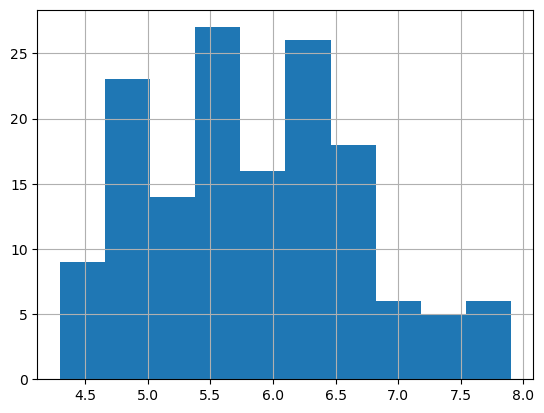

In [8]:
data['sepal_length'].hist()#easy to train

<Axes: >

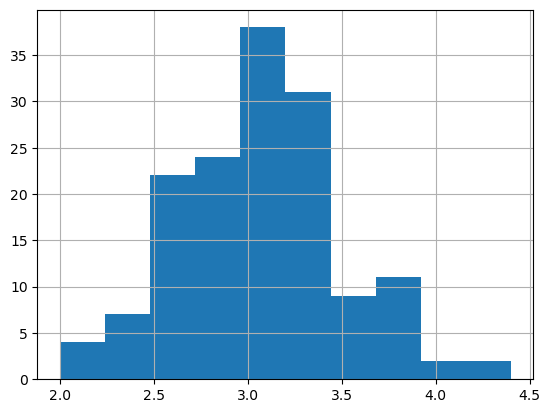

In [9]:
data['sepal_width'].hist()#easy to train

<Axes: >

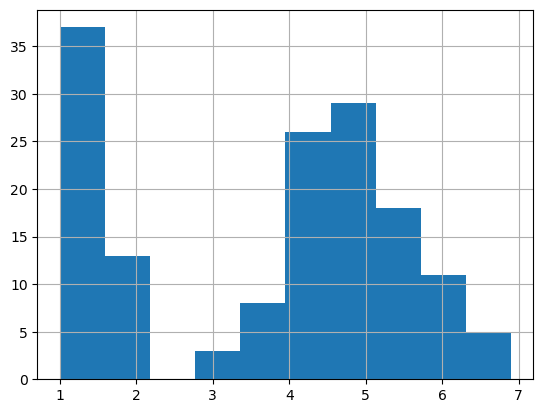

In [10]:
data['petal_length'].hist()#not easy to train because two classes are merged together and one class is seperate

<Axes: >

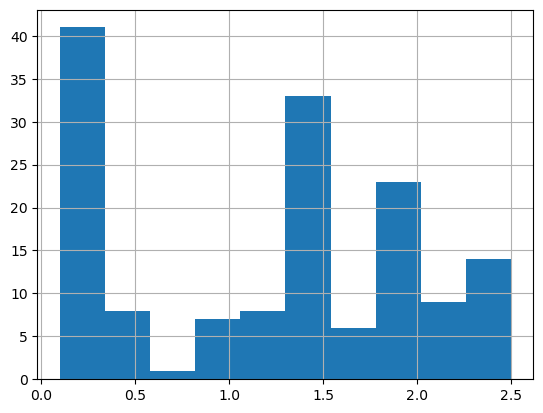

In [11]:
data['petal_width'].hist()#not easy to train because two classes are merged together and one class is seperate

### Using Scatterplot

In [12]:
colors = ['red','yellow','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

Text(0, 0.5, 'Sepal Width')

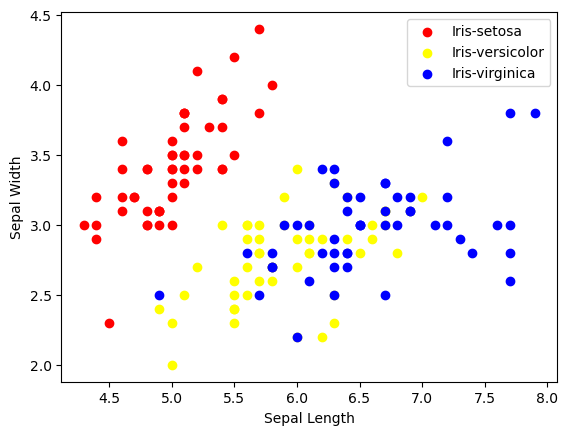

In [13]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

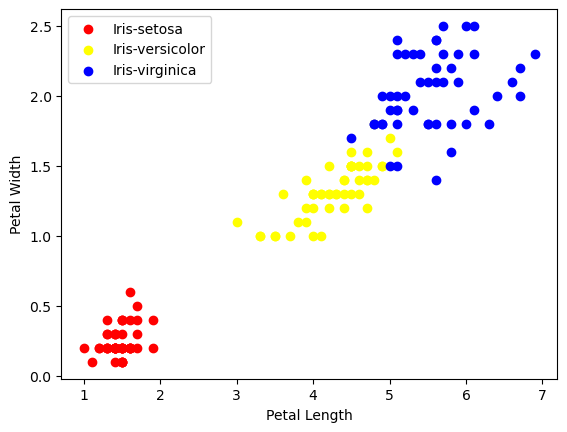

In [14]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Length')

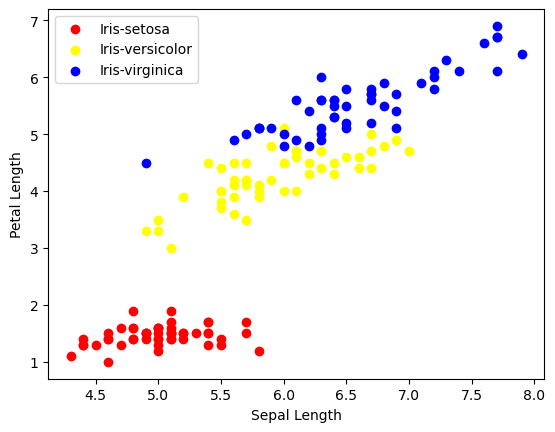

In [15]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Width')

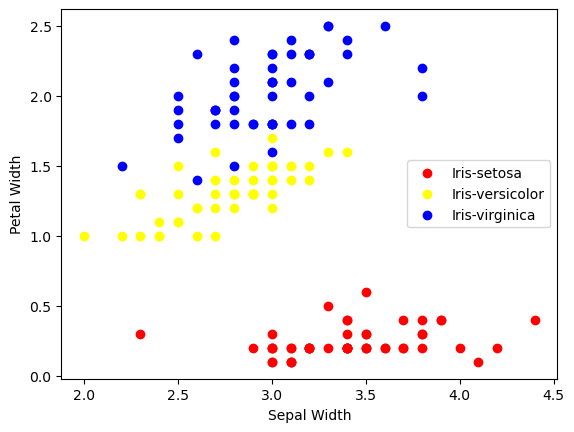

In [16]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

## Label Encoder

### To change the names of species into numbers; i.e- "Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2"

In [29]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [30]:
data['species'] = l.fit_transform(data['species'])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model Training

In [41]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [33]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [34]:
Accuracy = (log_reg.score(x_test,y_test) * 100)
Accuracy

100.0

## K-Nearest Neighbor Classification

In [42]:
from sklearn.neighbors import KNeighborsClassifier
log_reg = KNeighborsClassifier()

In [43]:
log_reg.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
Accuracy = (log_reg.score(x_test,y_test) * 100)
Accuracy

100.0

## Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier
log_reg = DecisionTreeClassifier()

In [39]:
log_reg.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
Accuracy = (log_reg.score(x_test,y_test) * 100)
Accuracy

97.77777777777777